#**Ramadhanul Husna [5026211059]**


Note : Jika anda ingin mengubah sentimen ke indonesia Harap ubah bagian :
1. Take Data
ubah bagian lang menjadi "id" agar yang diambil Indonesia
2. Remove Emoji and Stopword
ubah bagian stopword dari "english" ke Indonesia

##Install Module

In [1]:
!pip install google_play_scraper
!pip install textblob
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (15,10)

<ipython-input-1-9ccb641008d5>:31: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

##Take Data

In [3]:
#Android App Riliv : Mental Health App link from Google Play at
#https://play.google.com/store/apps/details?id=nozero.apps1&hl=id
#Dated 9 September 2024: number of reviews 331K

from google_play_scraper import app, Sort, reviews_all

riliv_reviews = reviews_all(
    'nozero.apps1',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [4]:
#Save the Riliv Apps reviews into dataframe
df_rilivrev = pd.DataFrame(np.array(riliv_reviews),columns=['content'])
df_rilivrev = df_rilivrev.join(pd.DataFrame(df_rilivrev.pop('content').tolist()))
df_rilivrev.to_csv(r'df_riliv.csv', index=False)
df_rilivrev.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ee6b0b5a-e7b2-4b80-87f8-882ae5d60031,Gusti ayu Karang,https://play-lh.googleusercontent.com/a/ACg8ocIDopXqKuNZoD1Wu-I7sjXQRTJH3FrHc17sGVP0qAbi1c_BKg=mo,Great,5,0,3.8.3,2024-09-09 09:29:50,None,NaT,3.8.3
1,3a7fda62-0f03-44fe-92a5-6b02a40389bc,William Dermawan putra,https://play-lh.googleusercontent.com/a-/ALV-UjU0cQSe8XKZERtyRRpUu-VugwITN0P2IhRNb50sEa6647VM0js,👍,5,0,3.8.3,2024-09-09 09:11:51,None,NaT,3.8.3
2,539f0b92-6c67-40fb-8b95-3598d22967ff,Wisnu Syah,https://play-lh.googleusercontent.com/a-/ALV-UjW_YcjC7AFX9BI_M0pFooBdobyVf8PmHMpbRadTBBP-lRX25abP,membuat ku merasa sedikit lebih baik,5,0,3.8.3,2024-09-09 08:35:56,None,NaT,3.8.3
3,253728bb-9419-4009-acd0-3e7a057fa5e5,Mulia Arifin,https://play-lh.googleusercontent.com/a-/ALV-UjW4gtBwQ3mbpCjp_wUp_T38UJTYeNPTkREkfv-oli71BxMc24rw,Recommended,5,0,3.8.3,2024-09-07 03:26:52,None,NaT,3.8.3
4,6eef1b40-ceb4-4b0b-9380-d7f01d9f358d,Ratna Sari,https://play-lh.googleusercontent.com/a/ACg8ocJTP6NL8U8YYkwTBExUyKU8nOOLykoIfm_sMCpKQHZLmpqszA=mo,"Maasya Allah..terima kasih riliv, aplikasi ini sangat bermanfaat dan berguna. Aku udah lama download ini, dan Aku juga mengalami mental illnes yg kadang kesusahan menghadapi perubahan mood dan emo...",5,0,None,2024-09-06 00:06:55,None,NaT,None


In [5]:
#Information on the table
df_rilivrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              2980 non-null   object        
 1   userName              2980 non-null   object        
 2   userImage             2980 non-null   object        
 3   content               2980 non-null   object        
 4   score                 2980 non-null   int64         
 5   thumbsUpCount         2980 non-null   int64         
 6   reviewCreatedVersion  2359 non-null   object        
 7   at                    2980 non-null   datetime64[ns]
 8   replyContent          2936 non-null   object        
 9   repliedAt             2936 non-null   datetime64[ns]
 10  appVersion            2359 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 256.2+ KB


In [6]:
print(df_rilivrev.reviewCreatedVersion.unique())
print(df_rilivrev.reviewCreatedVersion.nunique())

['3.8.3' None '3.8.2' '3.8.1' '3.8.0' '3.7.3' '3.7.9' '3.7.8' '3.7.6'
 '3.7.7' '3.7.5' '3.6.7' '3.4.5' '3.7.4' '3.7.2' '3.7.1' '3.7.0' '3.6.9'
 '3.6.8' '3.6.6' '3.6.5' '3.6.4' '3.6.2' '3.6.1' '3.6.0' '3.5.9' '3.5.1'
 '3.5.3' '3.5.7' '3.5.5' '3.4.0' '3.5.2' '3.5.0' '3.4.8' '3.4.9' '3.4.6'
 '3.4.7' '3.4.4' '3.4.3' '3.4.2' '3.3.3' '3.4.1' '3.3.1' '3.2.1' '3.1.1'
 '3.3.2' '3.1.3' '3.2.2' '3.2.0' '3.1.2' '3.0.9' '3.0.3' '3.0.8' '2.4.0'
 '2.3.4' '3.0.7' '3.0.2' '2.3.8' '3.0.1' '3.0' '2.4.2' '2.4.1' '2.3.9'
 '1.4.2' '2.3.5' '2.3.6' '2.3.3' '2.3.1' '2.2.9' '2.3.0' '2.2.7' '2.2.6'
 '2.2.5' '2.2.3' '2.2.4' '1.0' '2.1.6.3' '2.1.6.1' '2.1.3' '1.6.5' '1.7.2'
 '1.7.6' '2.1.1' '1.6.7' '1.3.5' '2.1.0' '2.0.07' '1.7.3' '2.0.02'
 '2.0.01' '2.0.0' '1.6.9' '1.7.5' '1.2.8' '1.6.4' '1.6.8' '1.6.6' '1.6.1'
 '1.2.9' '1.6.0' '1.5.9' '1.5.8' '1.5.6' '1.5.5' '1.5.3' '1.5.2' '1.5'
 '1.4.9' '1.4.5' '1.4.3' '1.4' '1.3.8' '1.3.6' '1.3.4' '1.3.3' '1.2.7']
115


##Sentiment Before Preprocessing

In [7]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_rilivrev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Great,5,0,3.8.3,2024-09-09 09:29:50,None,NaT
1,👍,5,0,3.8.3,2024-09-09 09:11:51,None,NaT
2,membuat ku merasa sedikit lebih baik,5,0,3.8.3,2024-09-09 08:35:56,None,NaT
3,Recommended,5,0,3.8.3,2024-09-07 03:26:52,None,NaT
4,"Maasya Allah..terima kasih riliv, aplikasi ini sangat bermanfaat dan berguna. Aku udah lama download ini, dan Aku juga mengalami mental illnes yg kadang kesusahan menghadapi perubahan mood dan emo...",5,0,None,2024-09-06 00:06:55,None,NaT
...,...,...,...,...,...,...,...
2975,Curthts,5,1,1.2.7,2015-10-15 17:43:30,terimakasih banyak dear untuk bintangnya:),2018-07-12 16:16:32
2976,nice nice,5,0,1.2.7,2015-10-15 11:47:51,Terima kasih Mu'arifi kalau ada saran sampaikan di sini ya :),2015-10-20 00:23:01
2977,Great app,5,0,1.2.7,2015-10-15 11:07:46,Terima kasih Azis atas masukan positifnya kalau ada saran sampaikan langsung aja di sini kami akan senang mendengarkannya,2015-10-20 00:22:18
2978,Membantu,5,1,1.2.7,2015-10-11 14:59:59,Terima kasih Dama Yanti atas masukan positifnya kalau ada saran sampaikan langsung aja di sini kami akan senang mendengarkannya,2015-10-20 00:22:06


In [8]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
df_rilivrev['sentiment_polarity'] = df_rilivrev['content'].apply(lambda x: TextBlob(x).polarity)
df_rilivrev['sentiment_subjective'] = df_rilivrev['content'].apply(lambda x: TextBlob(x).subjectivity)

In [9]:
df_rilivrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,Great,5,0.8,0.75
1,👍,5,0.0,0.00
2,membuat ku merasa sedikit lebih baik,5,0.0,0.00
3,Recommended,5,0.0,0.00
4,"Maasya Allah..terima kasih riliv, aplikasi ini sangat bermanfaat dan berguna. Aku udah lama download ini, dan Aku juga mengalami mental illnes yg kadang kesusahan menghadapi perubahan mood dan emo...",5,-0.1,0.20
...,...,...,...,...
2975,Curthts,5,0.0,0.00
2976,nice nice,5,0.6,1.00
2977,Great app,5,0.8,0.75
2978,Membantu,5,0.0,0.00


In [10]:
#Check number of reviews scores
df_rilivrev['score'].value_counts()

,count
score,
5,1937
1,344
4,334
3,213
2,152


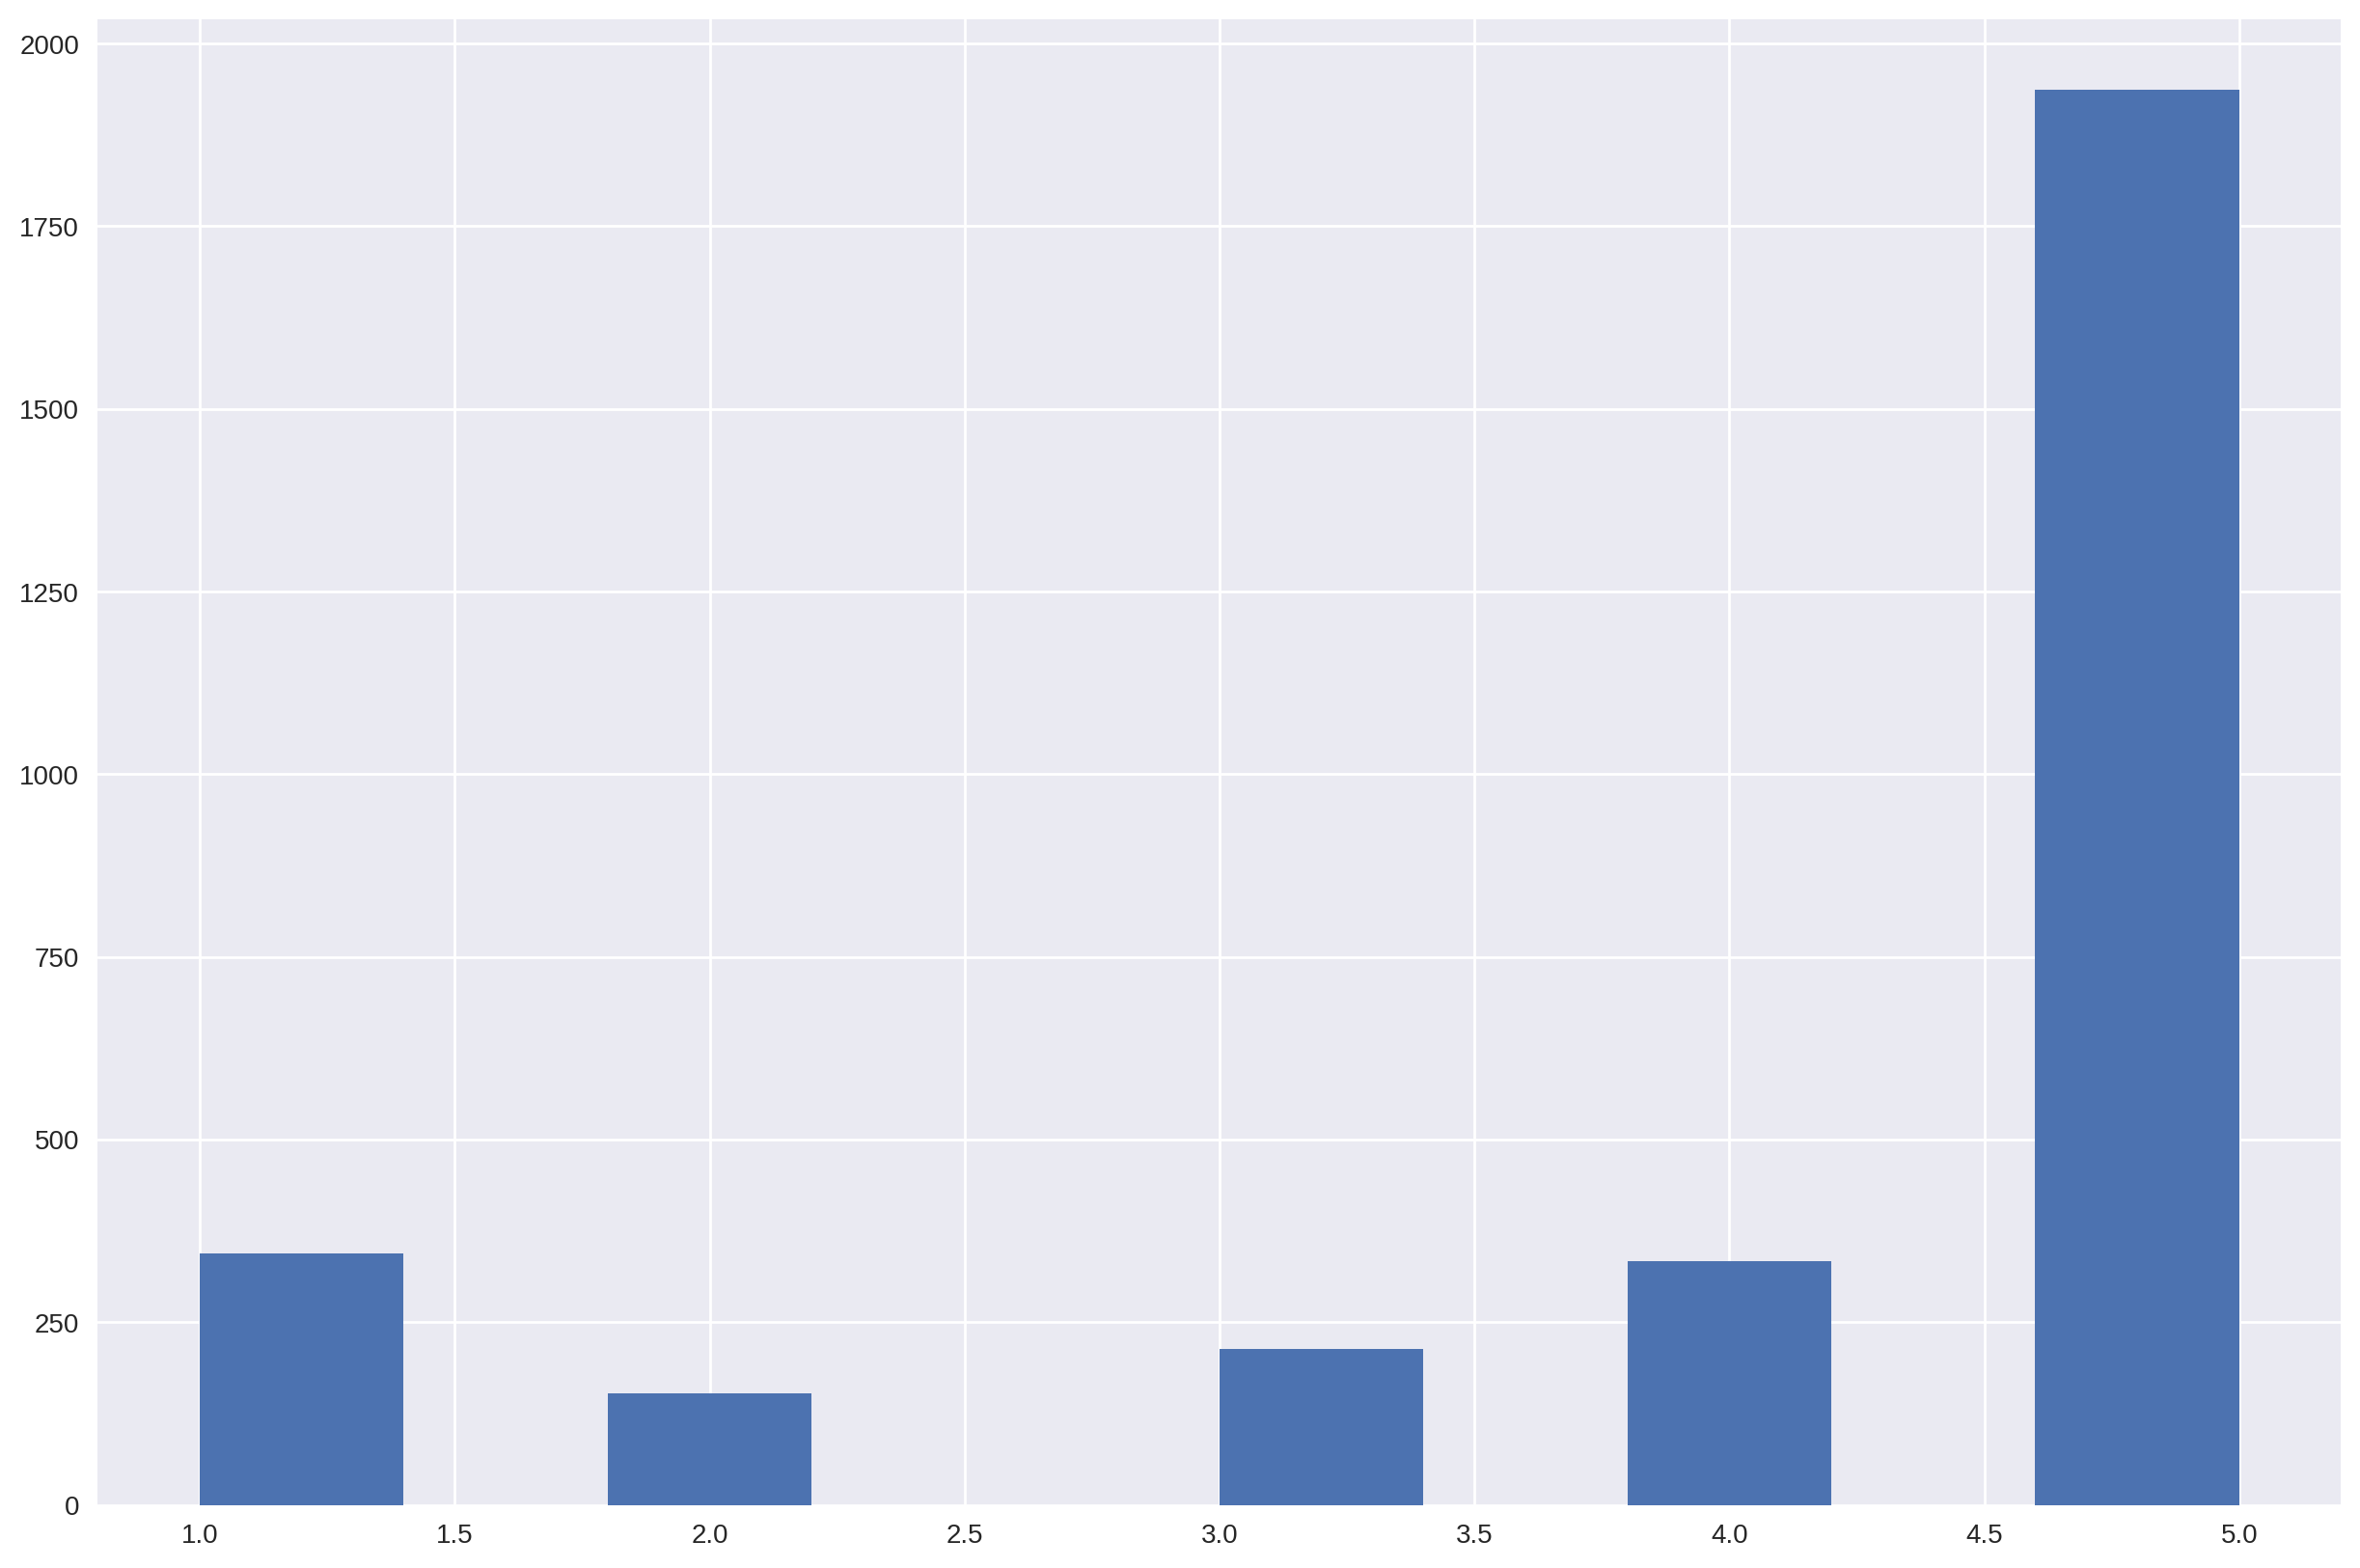

In [11]:
plt.hist(df_rilivrev['score'])
plt.show()

##Data Preprocessing

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Removing stopwords
#Using nltk
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from string import punctuation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###Make Lowercase

In [13]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_rilivrev['content'] = df_rilivrev['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_rilivrev['content'][200])

Keren bangettt, mindfullness🤍🥺


In [14]:
#Lowercase all reviews to see the difference
df_rilivrev['content']= df_rilivrev['content'].apply(lambda x: x.lower())
print(df_rilivrev['content'][200])

keren bangettt, mindfullness🤍🥺


In [15]:
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_rilivrev['wordCount'] = [len(review.split()) for review in df_rilivrev['content']]

df_rilivrev['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in df_rilivrev['content']]

df_rilivrev['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in df_rilivrev['content']]

In [16]:
df_rilivrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,great,5,0.8,0.75,1,0,0
1,👍,5,0.0,0.00,1,0,0
2,membuat ku merasa sedikit lebih baik,5,0.0,0.00,6,0,0
3,recommended,5,0.0,0.00,1,0,0
4,"maasya allah..terima kasih riliv, aplikasi ini sangat bermanfaat dan berguna. aku udah lama download ini, dan aku juga mengalami mental illnes yg kadang kesusahan menghadapi perubahan mood dan emo...",5,-0.1,0.20,60,0,9
...,...,...,...,...,...,...,...
2975,curthts,5,0.0,0.00,1,0,0
2976,nice nice,5,0.6,1.00,2,0,0
2977,great app,5,0.8,0.75,2,0,0
2978,membantu,5,0.0,0.00,1,0,0


###Check Freq Word

In [17]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

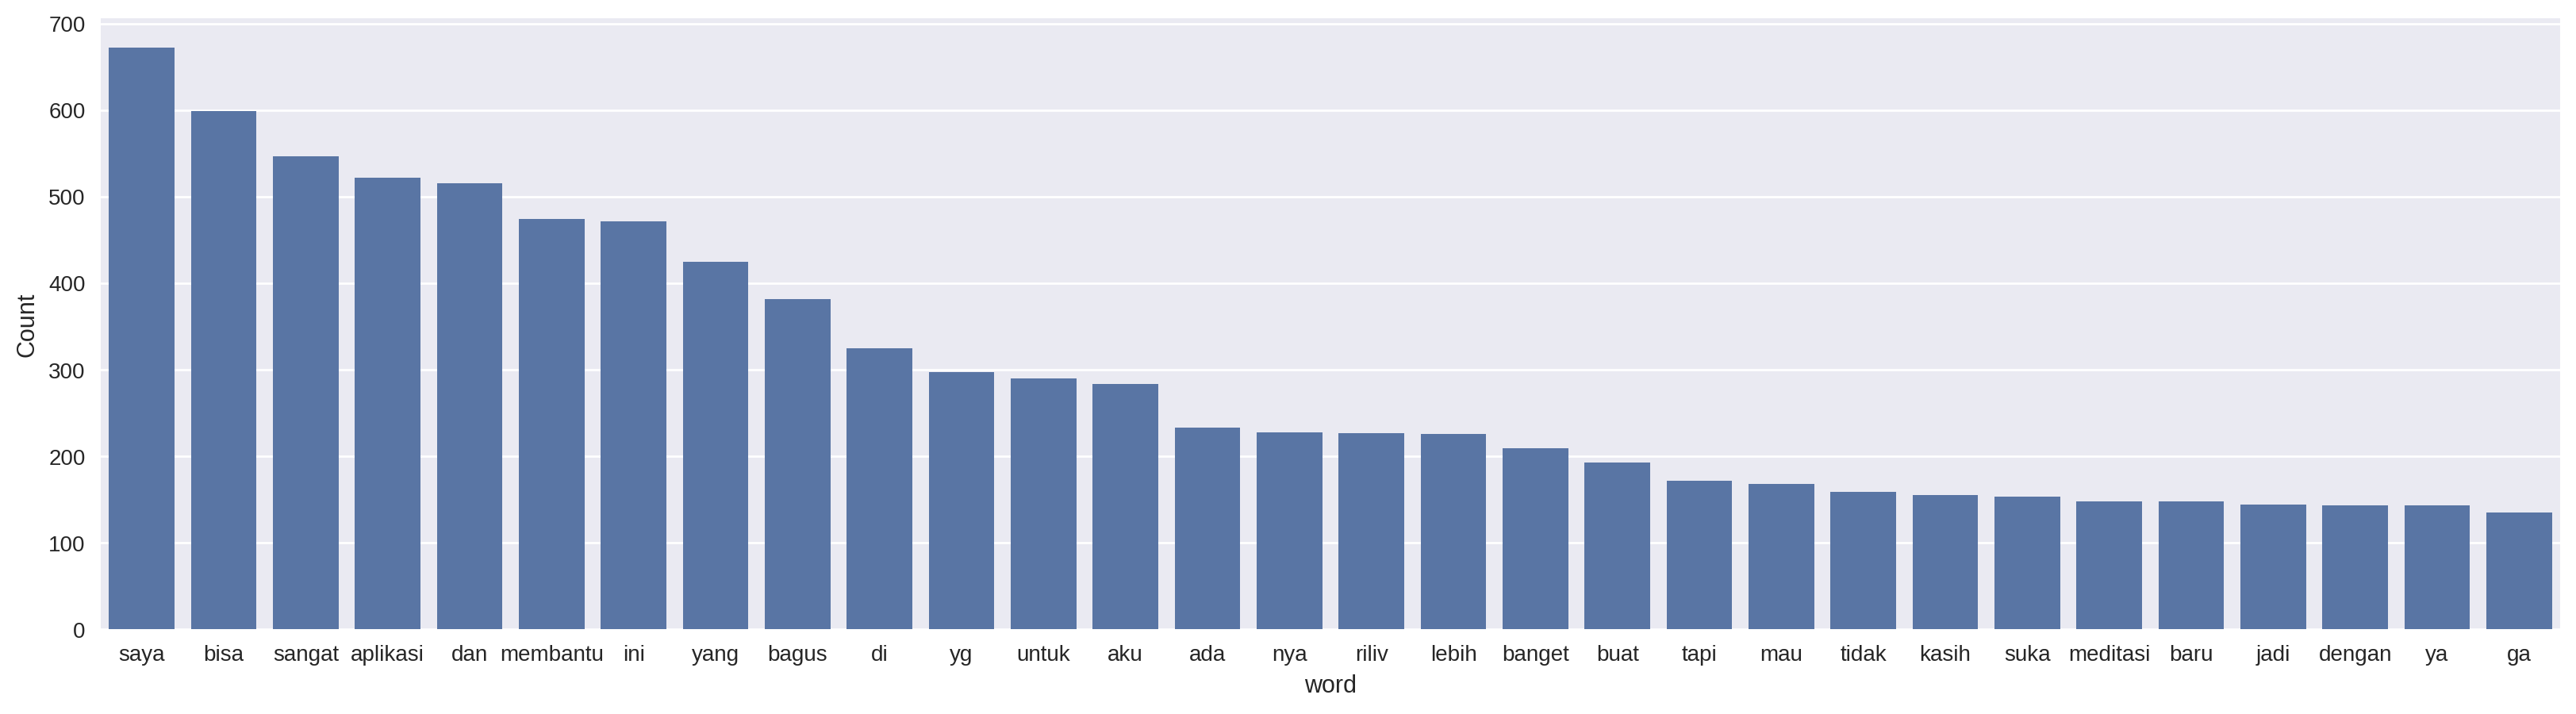

In [18]:
freq_words(df_rilivrev['content'])

###Check Special Character

In [19]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(df_rilivrev.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
    expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return expe.findall(s)
    return expe.sub(r'',s)

for y in df_rilivrev['content']:
    #print(str(extract_emojis(y)))
    extracted_emojis.append(str(extract_emojis(y)))

print(extracted_emojis)

True
['[]', "['👍']", '[]', '[]', "['🤲', '🏻', '🥰']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😏', '😏']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🥺']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😢']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🤦']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😍', '👍']", '[]', '[]', '[]', "['🥰']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😭', '😭', '😭', '😭']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😁', '😊']", '[]', "['😊']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🙂']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['😭']", "['🤗']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🥰', '🥰']", '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', "['🤗']", '[]', '[]', '[]', '[]', '[]', '[]', '

In [20]:
df_rilivrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,great,5,0.8,0.75,1,0,0
1,👍,5,0.0,0.00,1,0,0
2,membuat ku merasa sedikit lebih baik,5,0.0,0.00,6,0,0
3,recommended,5,0.0,0.00,1,0,0
4,"maasya allah..terima kasih riliv, aplikasi ini sangat bermanfaat dan berguna. aku udah lama download ini, dan aku juga mengalami mental illnes yg kadang kesusahan menghadapi perubahan mood dan emo...",5,-0.1,0.20,60,0,9
...,...,...,...,...,...,...,...
2975,curthts,5,0.0,0.00,1,0,0
2976,nice nice,5,0.6,1.00,2,0,0
2977,great app,5,0.8,0.75,2,0,0
2978,membantu,5,0.0,0.00,1,0,0


In [21]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_rilivrev['sentiment_rating'] = df_rilivrev['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [22]:
df_rilivrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,great,5,0.8,0.75,Positive
1,👍,5,0.0,0.00,Positive
2,membuat ku merasa sedikit lebih baik,5,0.0,0.00,Positive
3,recommended,5,0.0,0.00,Positive
4,"maasya allah..terima kasih riliv, aplikasi ini sangat bermanfaat dan berguna. aku udah lama download ini, dan aku juga mengalami mental illnes yg kadang kesusahan menghadapi perubahan mood dan emo...",5,-0.1,0.20,Positive
...,...,...,...,...,...
2975,curthts,5,0.0,0.00,Positive
2976,nice nice,5,0.6,1.00,Positive
2977,great app,5,0.8,0.75,Positive
2978,membantu,5,0.0,0.00,Positive


###Sentimen Polarity Before Stopword

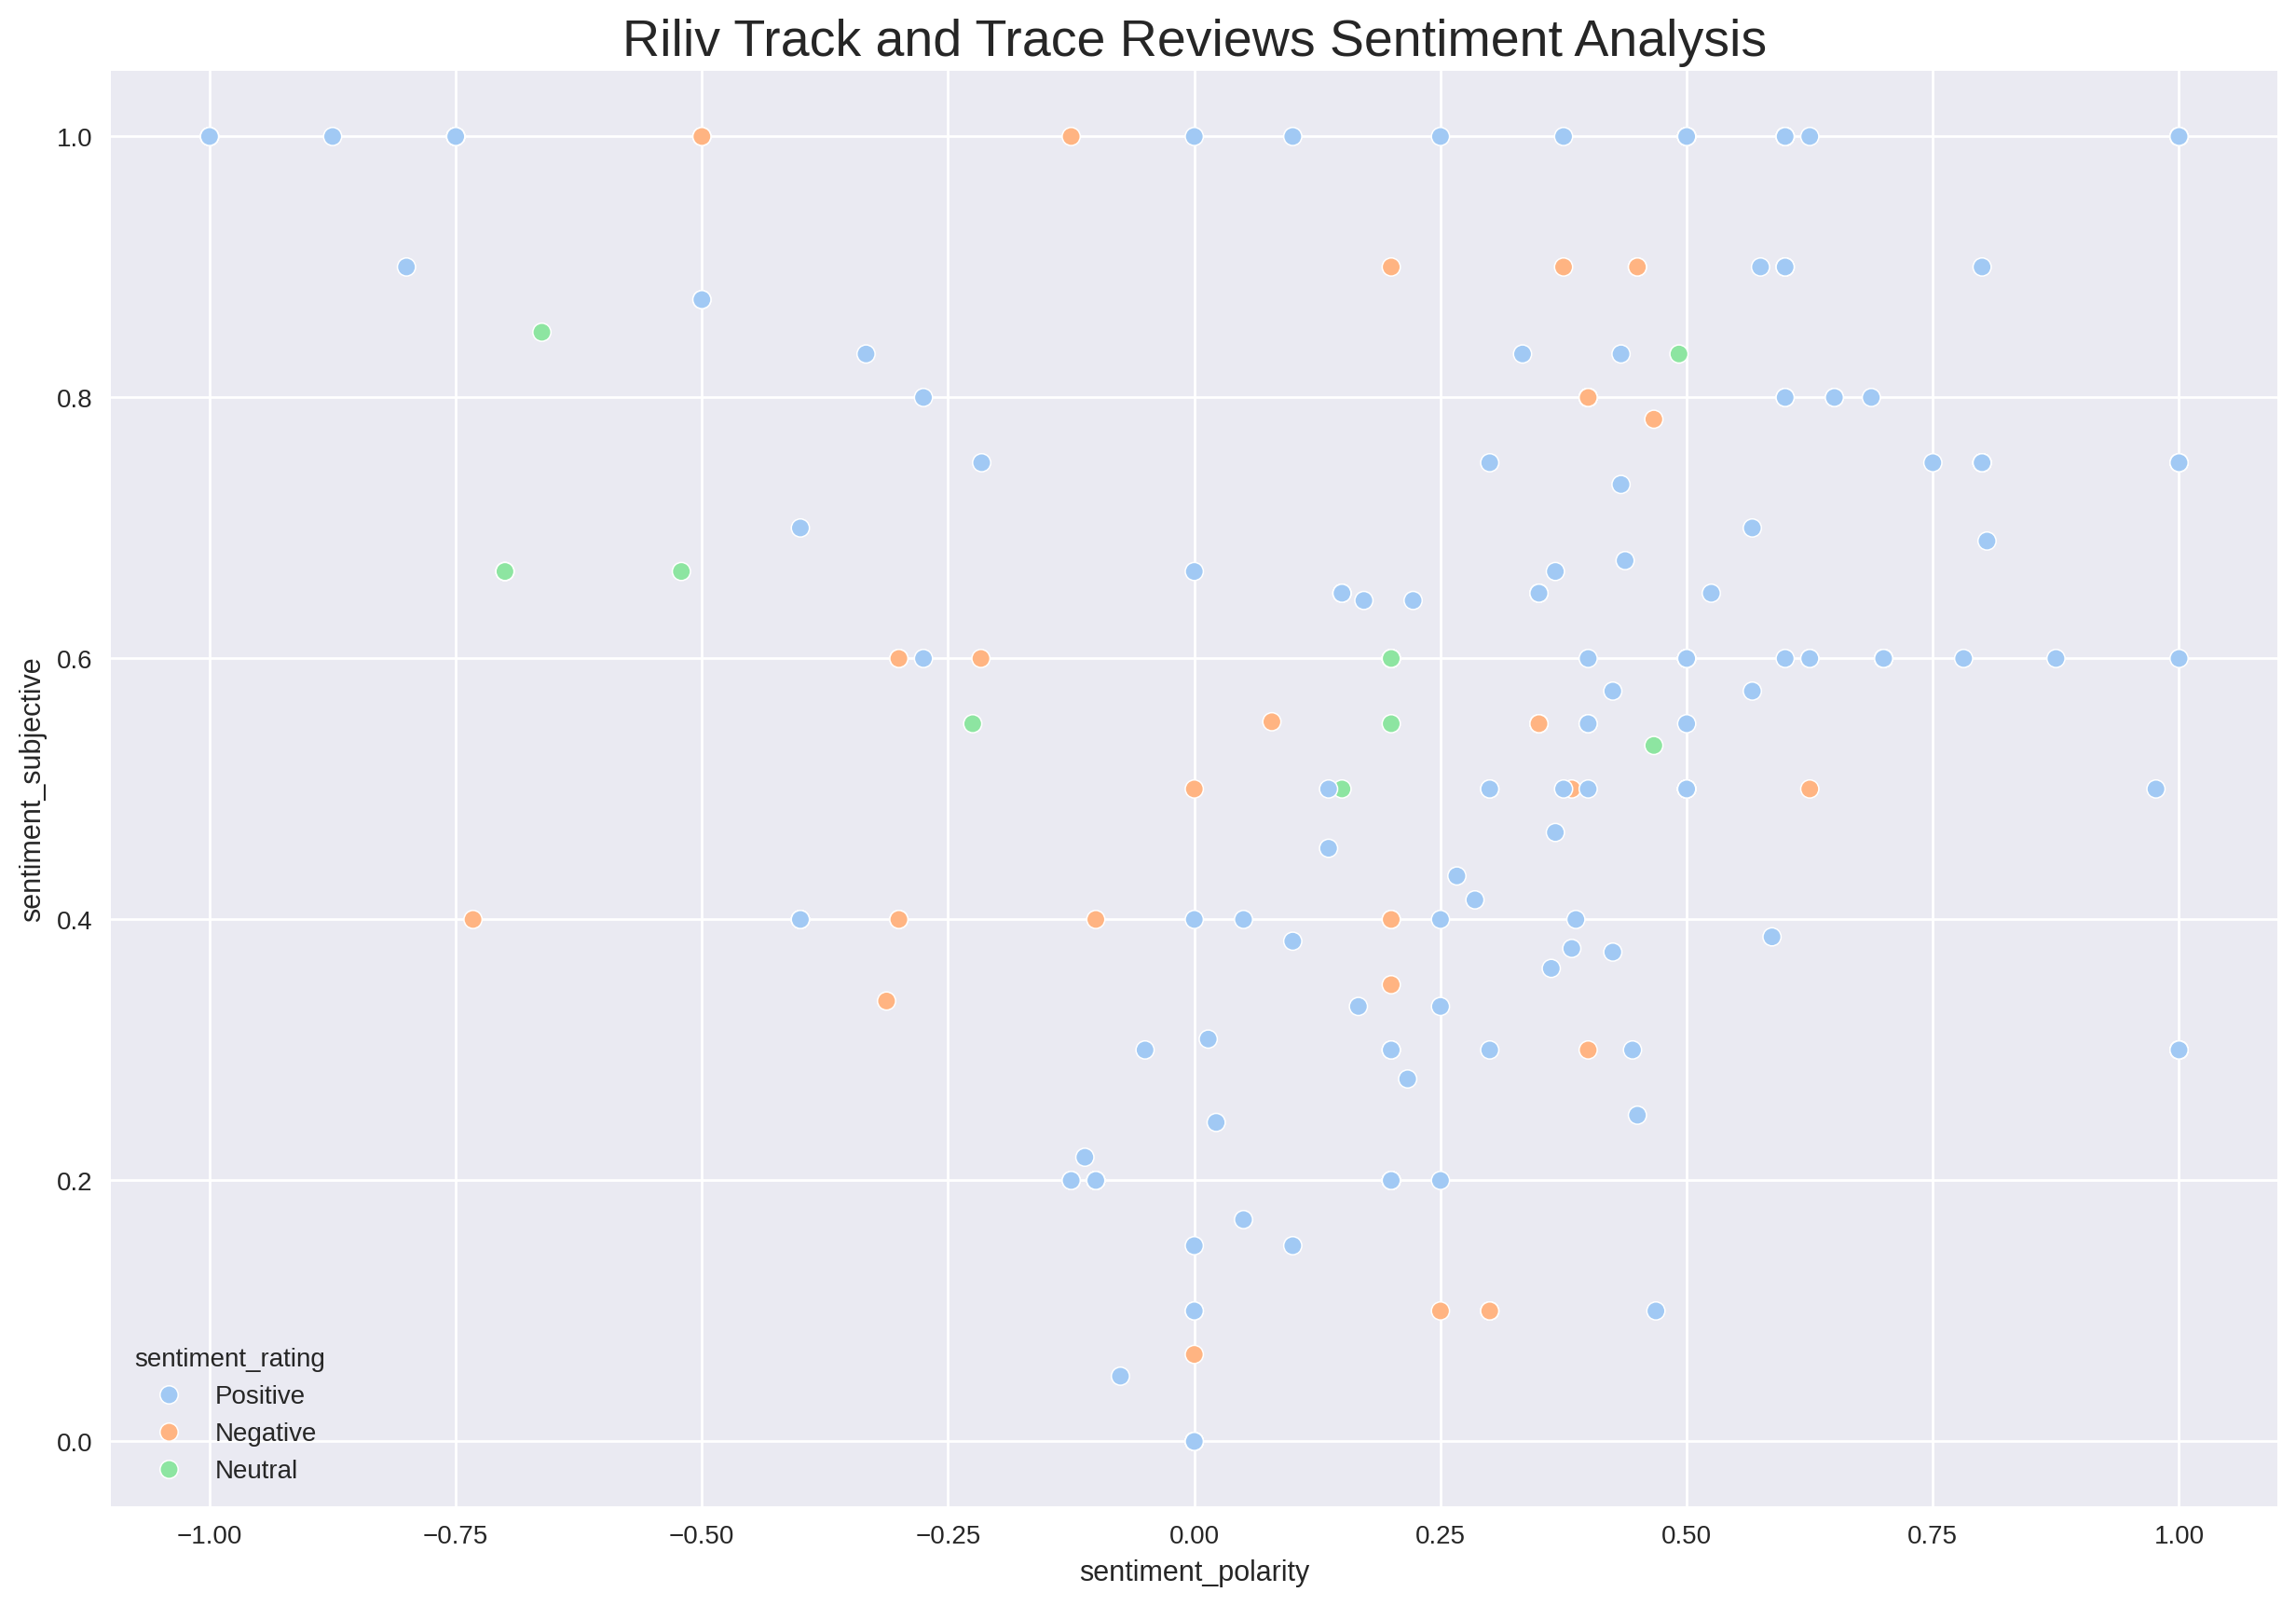

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Gunakan argumen keyword 'x' dan 'y' dengan benar
sns.scatterplot(x=df_rilivrev['sentiment_polarity'],
                y=df_rilivrev['sentiment_subjective'],
                hue=df_rilivrev['sentiment_rating'],
                edgecolor='white',
                palette="pastel")

plt.title("Riliv Track and Trace Reviews Sentiment Analysis", fontsize=20)
plt.show()


##Tokenize, Remove Emoji and Stopword

In [24]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import emoji

# Pastikan stopwords dan punkt sudah diunduh
nltk.download('punkt')

# Fungsi untuk menghapus emoji
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

# Fungsi untuk tokenisasi
def tokenize_text(text):
    tokens = word_tokenize(text)  # Tokenisasi
    return ' '.join(tokens)

# Load DataFrame jika belum ada
# df_rilivrev = pd.read_csv('path_to_your_csv_file')

# Terapkan fungsi penghapusan emoji
df_rilivrev['content'] = df_rilivrev['content'].apply(remove_emoji)

# Tokenisasi
df_rilivrev['tweet_tokenized'] = df_rilivrev['content'].apply(tokenize_text)

# Simpan DataFrame dengan hasil tokenisasi
df_rilivrev.to_csv(r'df_riliv_tokenized.csv', index=False)

# Tampilkan DataFrame setelah tokenisasi
print(df_rilivrev.loc[:, ["content", "tweet_tokenized"]])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                                                                                                                                                                      content  \
0                                                                                                                                                                                                       great   
1                                                                                                                                                                                                               
2                                                                                                                                                                        membuat ku merasa sedikit lebih baik   
3                                                                                                                                                                   

In [25]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re

# Pastikan stopwords sudah diunduh
nltk.download('stopwords')

# Fungsi untuk menghapus stopwords
def remove_stopwords(text, stop_words):
    tokens = text.split()  # Tokenisasi sederhana
    tokens = [word for word in tokens if word.lower() not in stop_words]  # Menghapus stopwords
    return ' '.join(tokens)

# Fungsi untuk menghapus karakter non-alfabet
def remove_non_alpha(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Load DataFrame jika belum ada
# df_rilivrev = pd.read_csv('path_to_your_csv_file')

# Stopwords
stop_words = set(stopwords.words('indonesian') + ["'", "yg", "nya", ",", "aja", "ya", "orang", "download", "banget", "bgt", "sih"])

# Terapkan fungsi penghapusan stopwords
df_rilivrev['tweet_with_stopwords'] = df_rilivrev['tweet_tokenized'].apply(lambda x: remove_stopwords(x, stop_words))

# Hapus karakter non-alfabet
df_rilivrev['tweet_with_stopwords'] = df_rilivrev['tweet_with_stopwords'].apply(remove_non_alpha)

# Hitung jumlah kata sebelum dan sesudah penghapusan stopwords
df_rilivrev['wordCount'] = df_rilivrev['tweet_tokenized'].apply(lambda x: len(x.split()))
df_rilivrev['wordCount_after_stopwords'] = df_rilivrev['tweet_with_stopwords'].apply(lambda x: len(x.split()))

# Simpan DataFrame dengan hasil penghapusan stopwords
df_rilivrev.to_csv(r'df_riliv_after_stopwords.csv', index=False)

# Tampilkan DataFrame setelah penghapusan stopwords
print(df_rilivrev.loc[:, ["content", "tweet_tokenized", "tweet_with_stopwords", "wordCount", "wordCount_after_stopwords"]])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                                                                                                                                                                      content  \
0                                                                                                                                                                                                       great   
1                                                                                                                                                                                                               
2                                                                                                                                                                        membuat ku merasa sedikit lebih baik   
3                                                                                                                                                                   

In [26]:
import pandas as pd

# Load DataFrame yang telah diproses
df_rilivrev_stopwords = pd.read_csv(r'df_riliv_after_stopwords.csv')
df_rilivrev_stopwords = df_rilivrev_stopwords.dropna()
# Tampilkan DataFrame dengan kolom yang diinginkan
df_rilivrev_stopwords.loc[:, ["content", "score", "sentiment_polarity", "sentiment_subjective", "sentiment_rating", "wordCount", "tweet_with_stopwords", "wordCount_after_stopwords"]]


,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating,wordCount,tweet_with_stopwords,wordCount_after_stopwords
21,"riliv keren, karena kasih aku banyak pengalaman dan pelajaran tentang pentingnya kesehatan mental. banyak meditasi juga, terus konselornya ramah-ramah.",5,-0.1,0.20,Positive,23,riliv keren kasih pengalaman pelajaran kesehatan mental meditasi konselornya ramahramah,10
22,"bagus!!! aplikasi nya bagus banget gak ada cacat sama sekali, recommended. download!!!",5,0.0,0.00,Positive,20,bagus aplikasi bagus gak cacat recommended,6
23,ok,5,0.5,0.50,Positive,1,ok,1
27,apk bagus,5,0.0,0.00,Positive,2,apk bagus,2
28,"membantu sekalii, di hari harii",5,0.0,0.00,Positive,6,membantu sekalii harii,3
...,...,...,...,...,...,...,...,...
2973,dipakai di malaysia koneksinya selalu error ya!,5,0.0,0.00,Positive,8,dipakai malaysia koneksinya error,4
2975,curthts,5,0.0,0.00,Positive,1,curthts,1
2976,nice nice,5,0.6,1.00,Positive,2,nice nice,2
2977,great app,5,0.8,0.75,Positive,2,great app,2


In [27]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

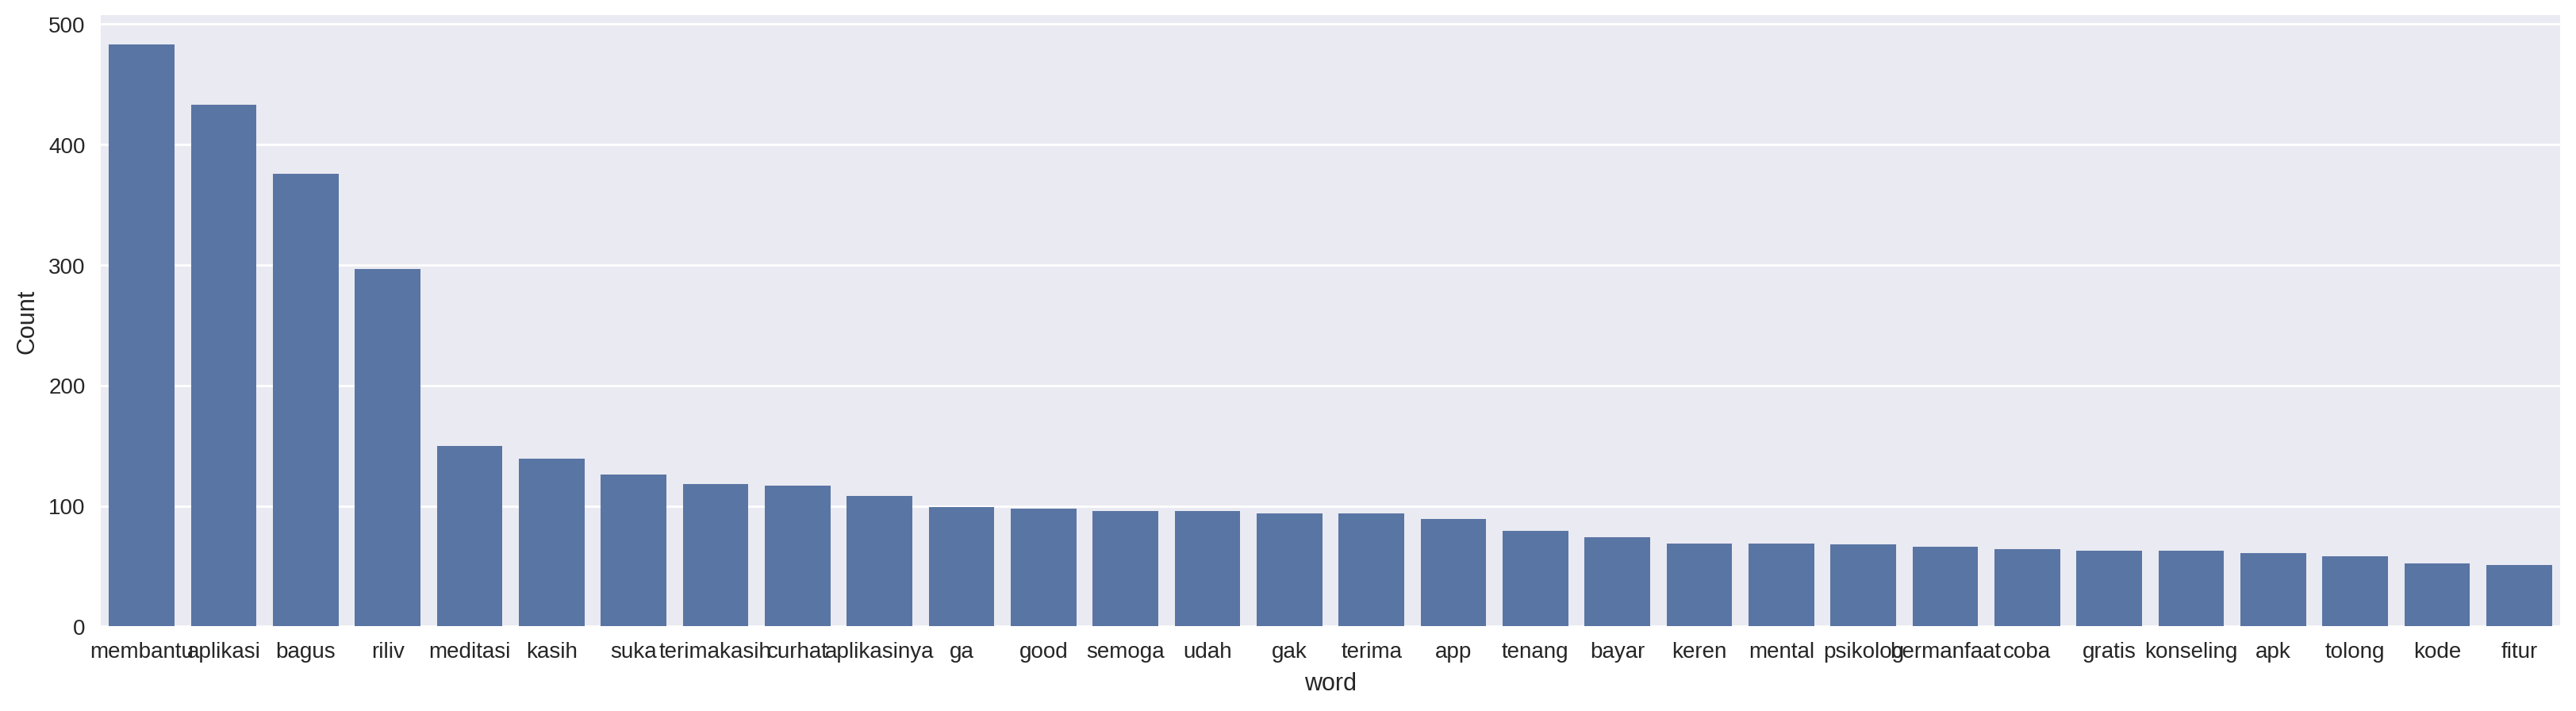

In [28]:
freq_words(df_rilivrev_stopwords['tweet_with_stopwords'])

##Stemming

In [29]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Inisialisasi PorterStemmer
st = PorterStemmer()

def stemming(text):
    return ' '.join([st.stem(word) for word in text.split()])

# Terapkan stemming
df_rilivrev_stopwords['tweet_stemmed'] = df_rilivrev_stopwords['tweet_with_stopwords'].apply(stemming)

# Tampilkan contoh sebelum dan sesudah stemming
for i in [0]:  # Ganti 200 dengan index yang Anda inginkan
    original_text = df_rilivrev_stopwords['tweet_with_stopwords'].iloc[i]
    stemmed_text = df_rilivrev_stopwords['tweet_stemmed'].iloc[i]
    print(f"Original: {original_text}")
    print(f"Stemmed:  {stemmed_text}")
    print()


Original: riliv keren kasih pengalaman pelajaran kesehatan mental  meditasi konselornya ramahramah 
Stemmed:  riliv keren kasih pengalaman pelajaran kesehatan mental meditasi konselornya ramahramah



##Result

In [30]:
df_rilivrev_stopwords.loc[:,["content","score","sentiment_rating","wordCount","tweet_with_stopwords", "wordCount_after_stopwords","tweet_stemmed"]]

,content,score,sentiment_rating,wordCount,tweet_with_stopwords,wordCount_after_stopwords,tweet_stemmed
21,"riliv keren, karena kasih aku banyak pengalaman dan pelajaran tentang pentingnya kesehatan mental. banyak meditasi juga, terus konselornya ramah-ramah.",5,Positive,23,riliv keren kasih pengalaman pelajaran kesehatan mental meditasi konselornya ramahramah,10,riliv keren kasih pengalaman pelajaran kesehatan mental meditasi konselornya ramahramah
22,"bagus!!! aplikasi nya bagus banget gak ada cacat sama sekali, recommended. download!!!",5,Positive,20,bagus aplikasi bagus gak cacat recommended,6,bagu aplikasi bagu gak cacat recommend
23,ok,5,Positive,1,ok,1,ok
27,apk bagus,5,Positive,2,apk bagus,2,apk bagu
28,"membantu sekalii, di hari harii",5,Positive,6,membantu sekalii harii,3,membantu sekalii harii
...,...,...,...,...,...,...,...
2973,dipakai di malaysia koneksinya selalu error ya!,5,Positive,8,dipakai malaysia koneksinya error,4,dipakai malaysia koneksinya error
2975,curthts,5,Positive,1,curthts,1,curtht
2976,nice nice,5,Positive,2,nice nice,2,nice nice
2977,great app,5,Positive,2,great app,2,great app


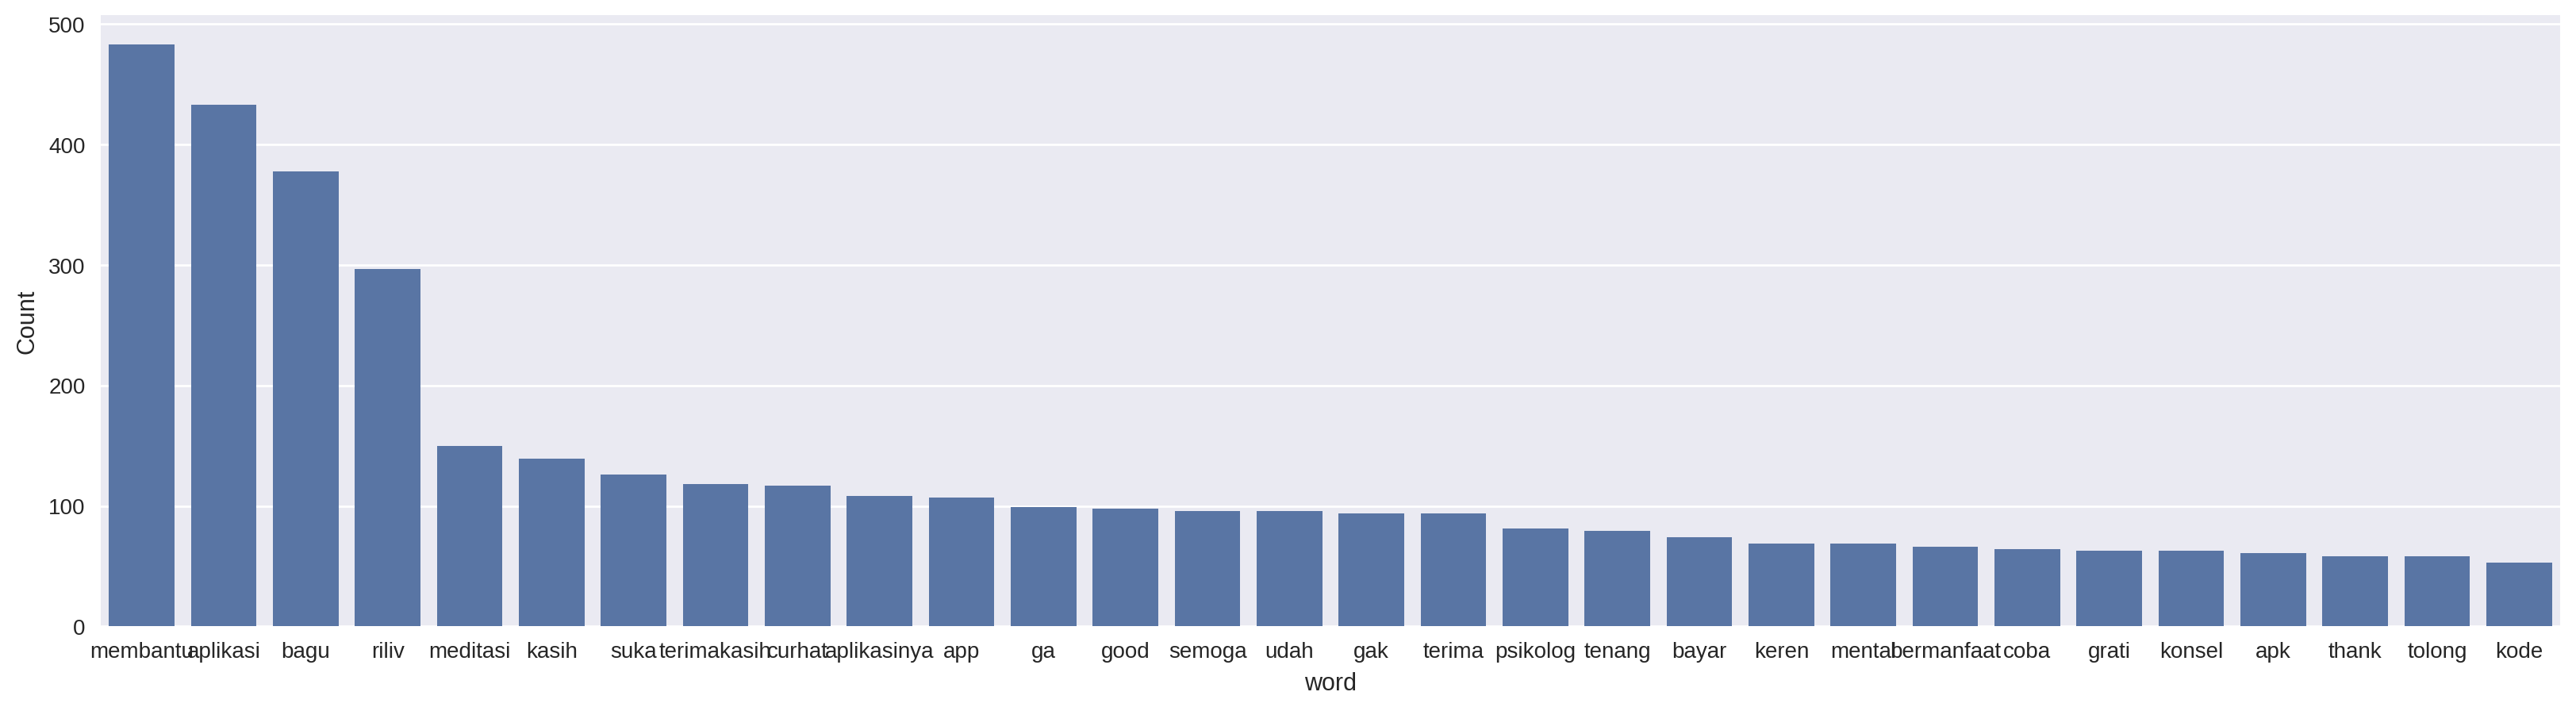

In [31]:
freq_words(df_rilivrev_stopwords['tweet_stemmed'])

###Rating

In [32]:
#Check number of reviews scores
df_rilivrev_stopwords['sentiment_rating'].value_counts()

,count
sentiment_rating,
Positive,1794
Negative,322
Neutral,148


###Sentimen Analysis

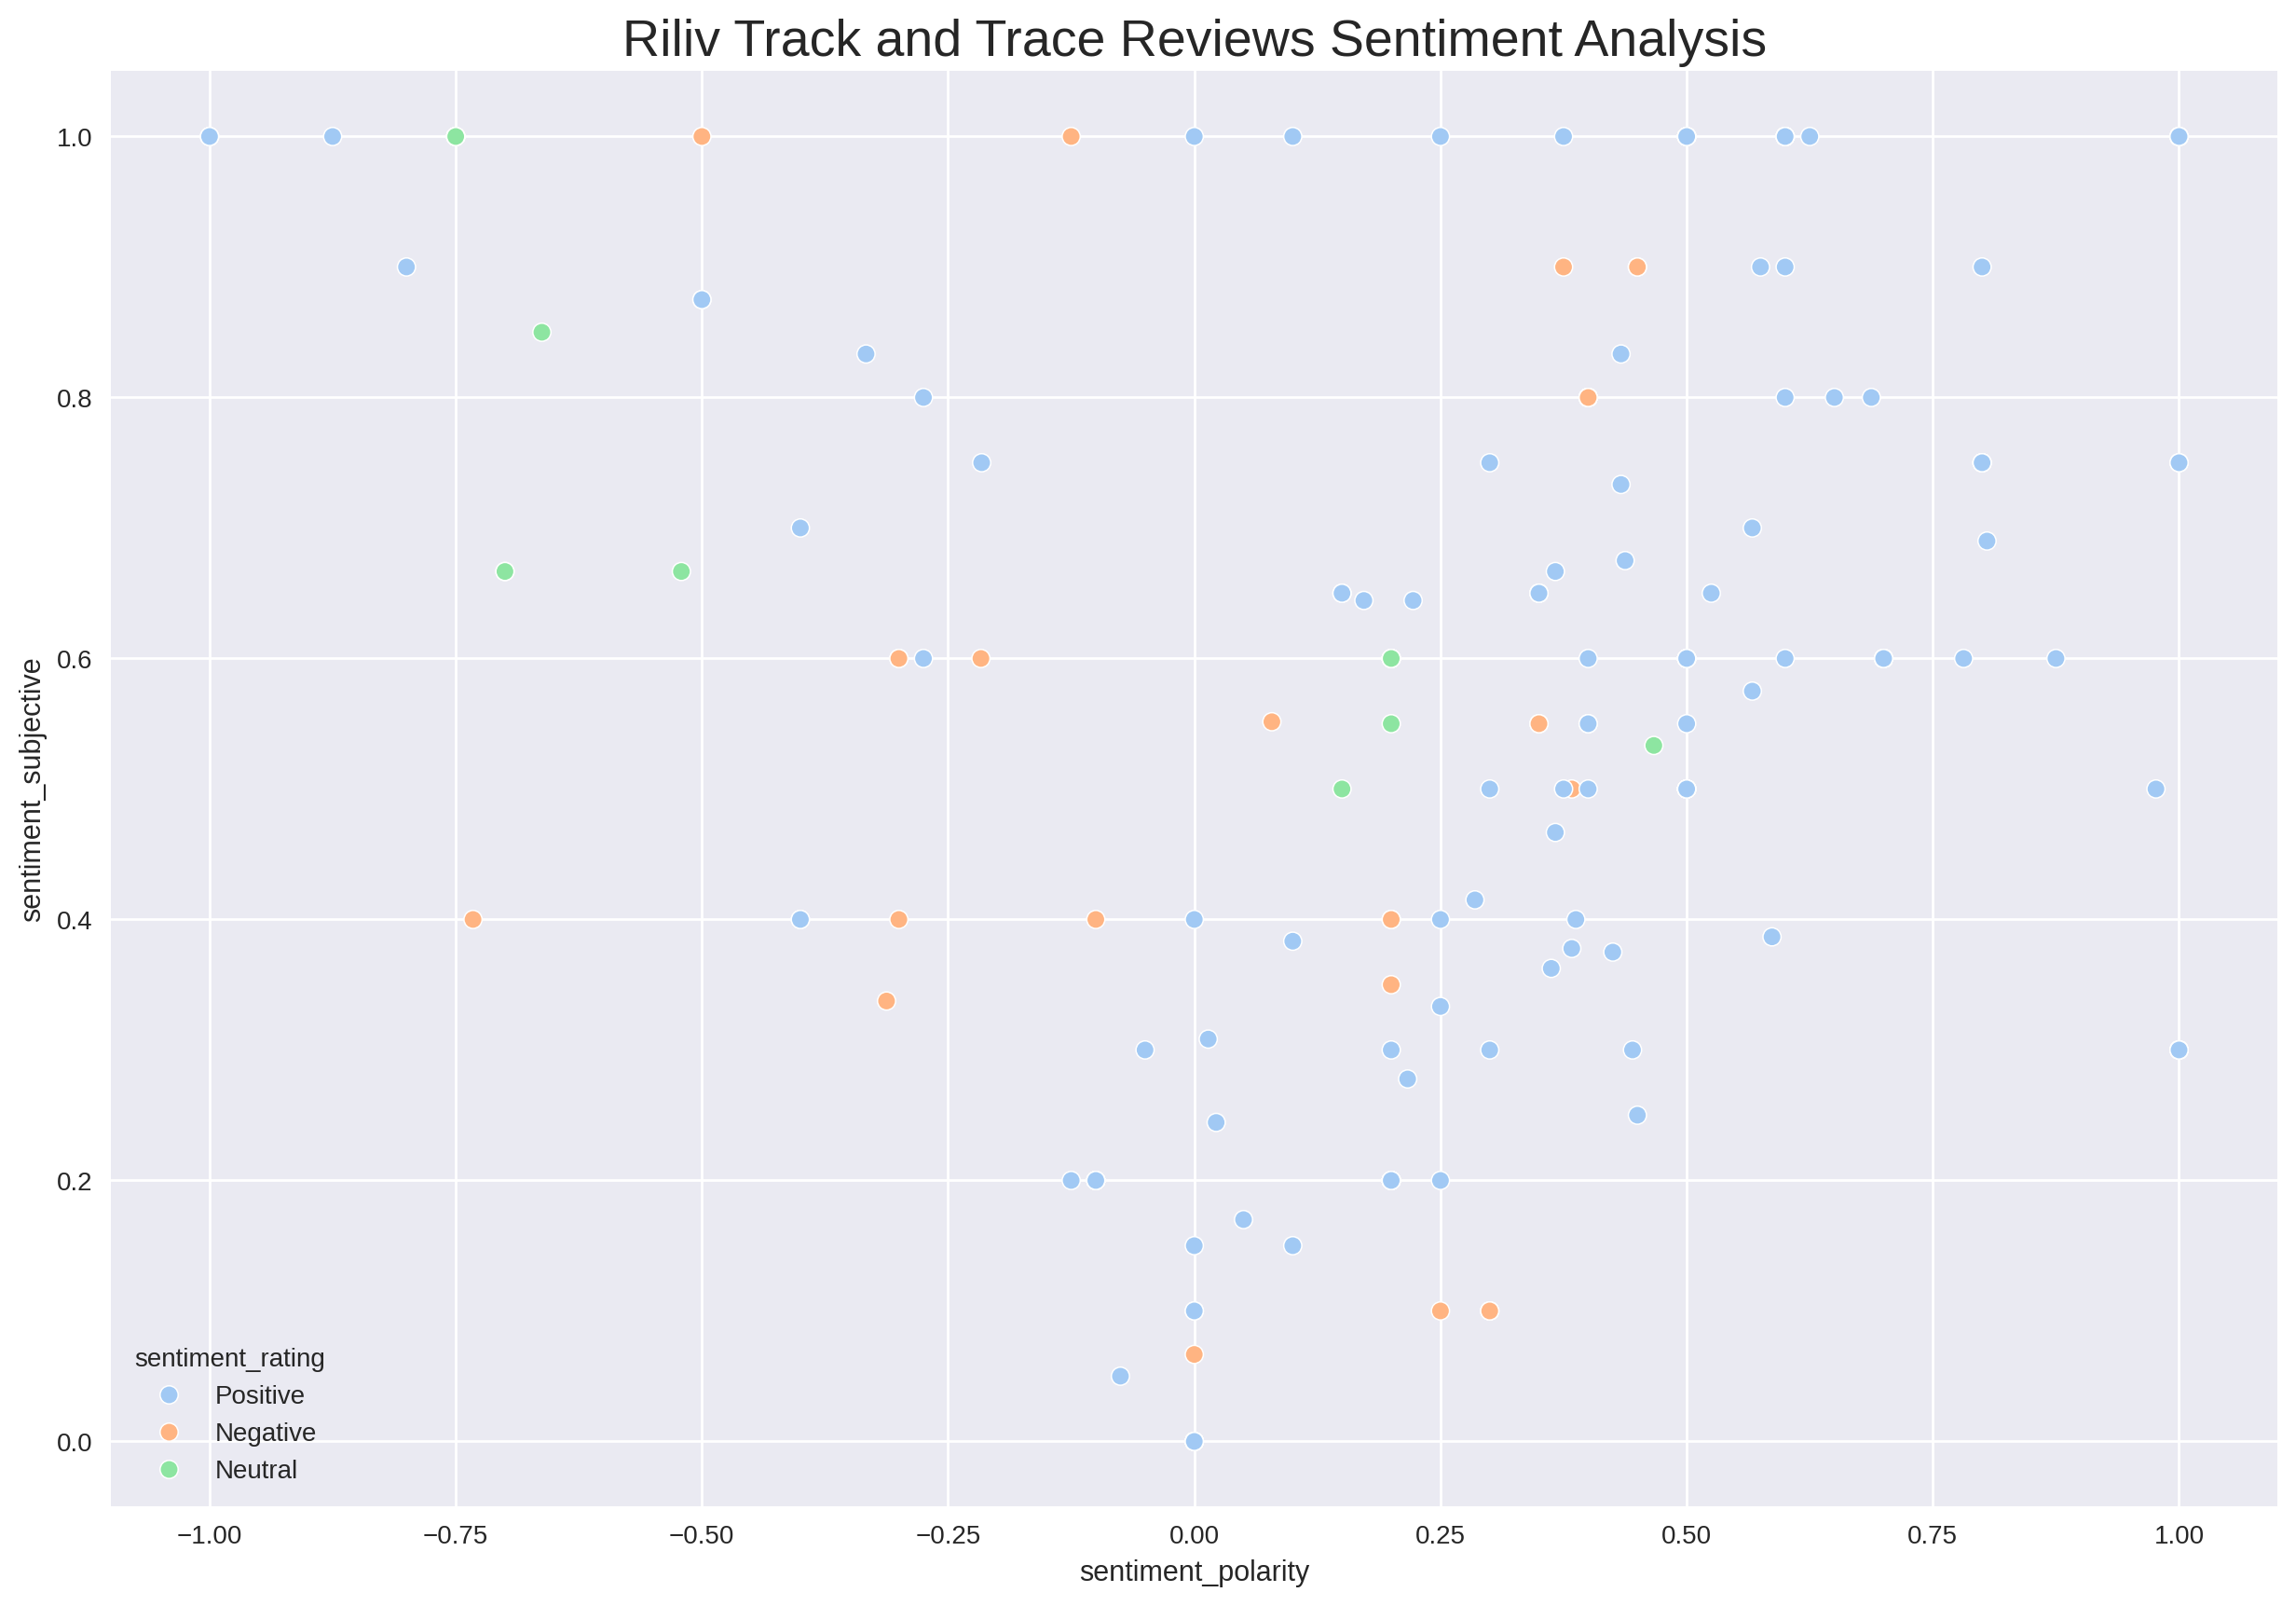

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Gunakan argumen keyword 'x' dan 'y' dengan benar
sns.scatterplot(x=df_rilivrev_stopwords['sentiment_polarity'],
                y=df_rilivrev_stopwords['sentiment_subjective'],
                hue=df_rilivrev_stopwords['sentiment_rating'],
                edgecolor='white',
                palette="pastel")

plt.title("Riliv Track and Trace Reviews Sentiment Analysis", fontsize=20)
plt.show()


###Score Freq

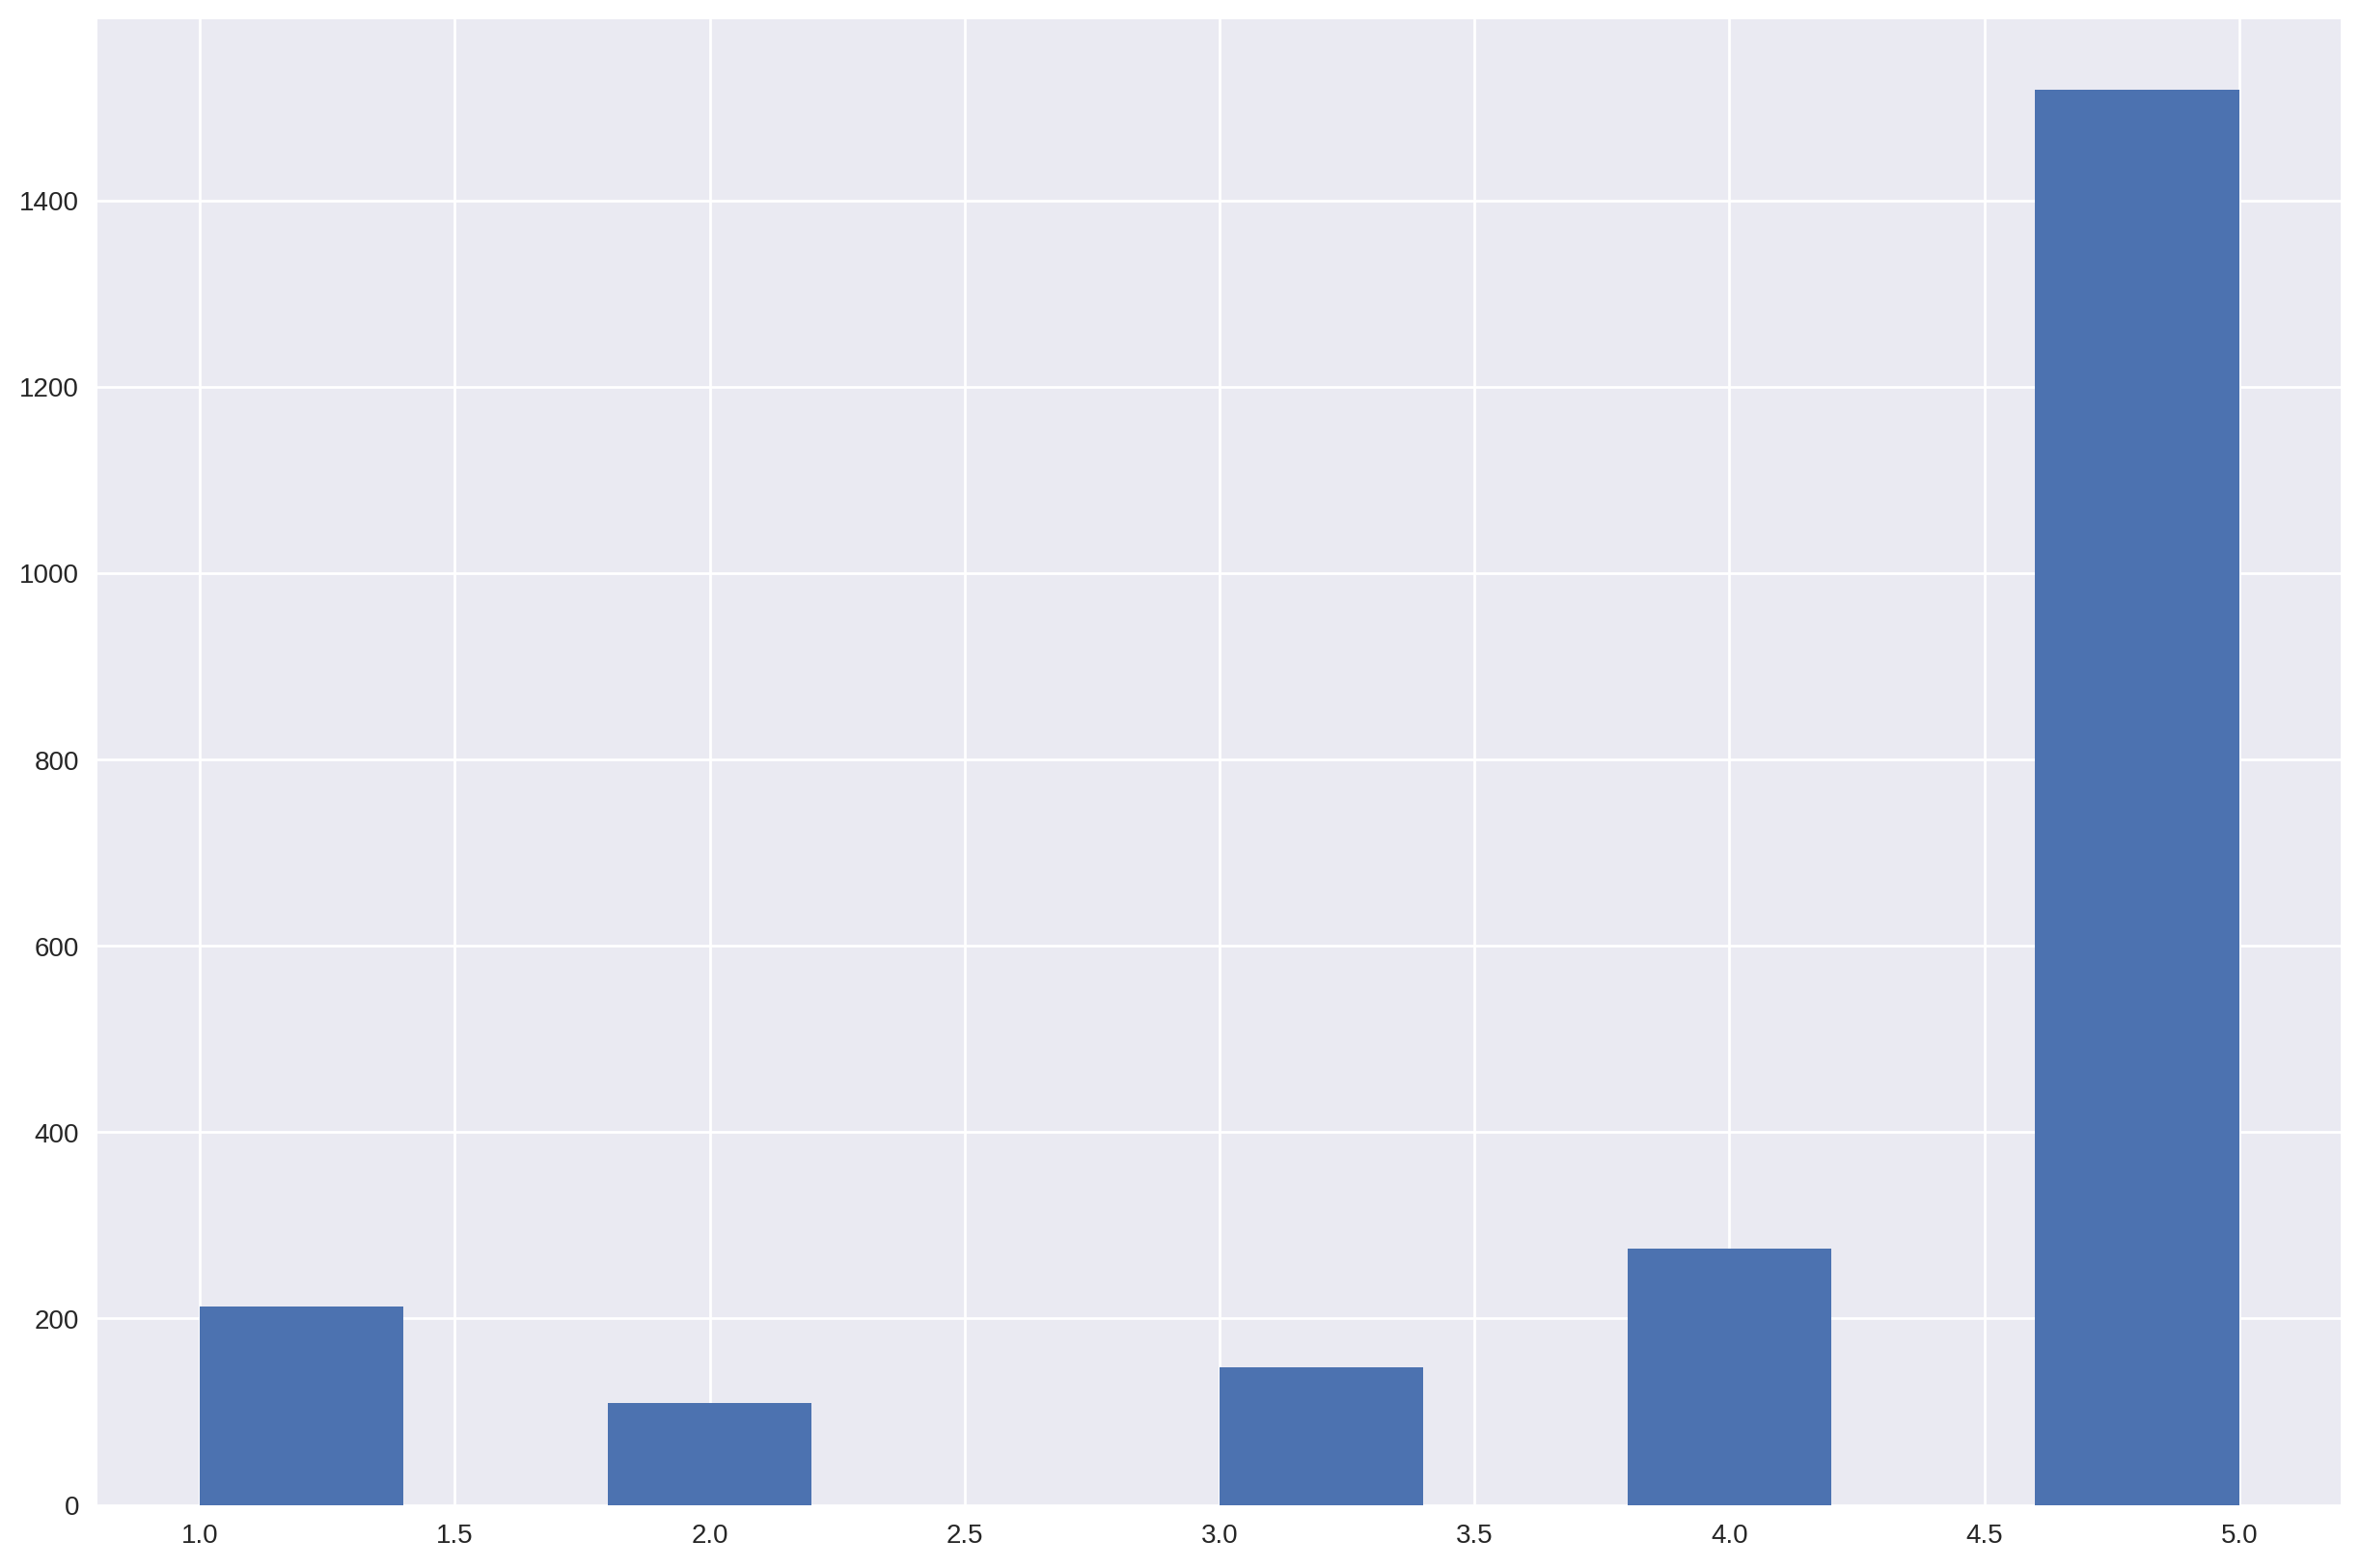

In [34]:
plt.hist(df_rilivrev_stopwords['score'])
plt.show()

SETELAH SEMUA YANG DILAKUKAN ANDA DAPAT MEMBUAT BERBAGAI ANALISIS SENTIMENT SEPERTI MENGELOMPOKKAN DALAM WAKTU TERTENTU ATAU VERSI DAN LAINNYA